# Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz, plot_tree
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'pydotplus'

# Load Data

In [2]:
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Data Cleaning

In [4]:
df.rename(columns={'account length': 'account_length', 'area code': 'area_code', 'phone number': 'phone_number',
                  'international plan': 'international_plan', 'voice mail plan': 'voice_mail_plan',
                  'number vmail messages': 'number_vmail_messages', 'total day minutes': 'total_day_minutes',
                  'total day calls': 'total_day_calls', 'total day charge': 'total_day_charge',
                  'total eve minutes': 'total_eve_minutes', 'total eve calls': 'total_eve_calls',
                  'total eve charge': 'total_eve_charge', 'total night minutes': 'total_night_minutes',
                  'total night calls': 'total_night_calls', 'total night charge': 'total_night_charge',
                  'total intl minutes': 'total_intl_minutes', 'total intl calls': 'total_intl_calls', 
                   'total intl charge': 'total_intl_charge', 'customer service calls': 'customer_service_calls'}, 
          inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [6]:
df['area_code'] = df.area_code.astype(object)

In [15]:
df_filtered = df.drop(['state', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan'], axis=1)

In [38]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   number_vmail_messages   3333 non-null   int64  
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   int64  
 4   total_day_charge        3333 non-null   float64
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_eve_charge        3333 non-null   float64
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_night_charge      3333 non-null   float64
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   

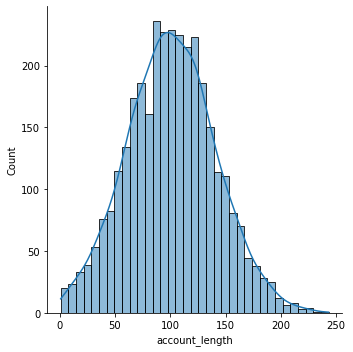

In [40]:
sns.displot(x=df_filtered['account_length'],kind='hist',kde=True);

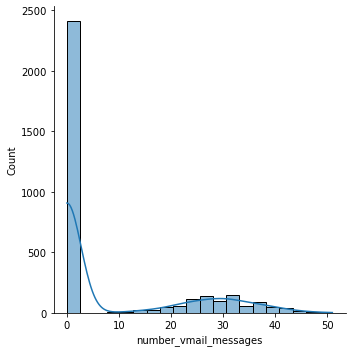

In [41]:
sns.displot(x=df_filtered['number_vmail_messages'],kind='hist',kde=True);

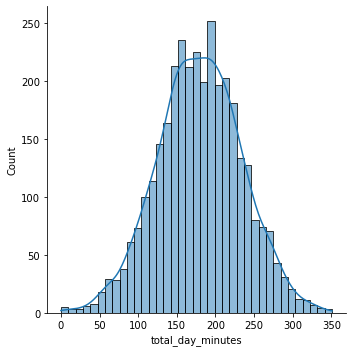

In [42]:
sns.displot(x=df_filtered['total_day_minutes'],kind='hist',kde=True);

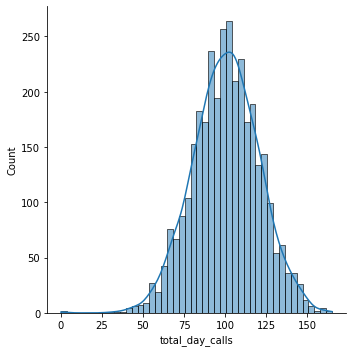

In [43]:
sns.displot(x=df_filtered['total_day_calls'],kind='hist',kde=True);

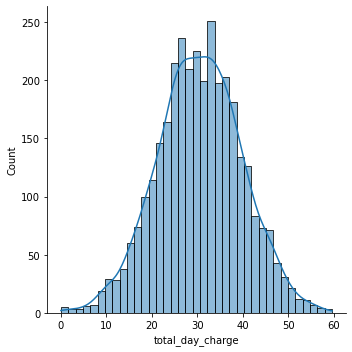

In [44]:
sns.displot(x=df_filtered['total_day_charge'],kind='hist',kde=True);

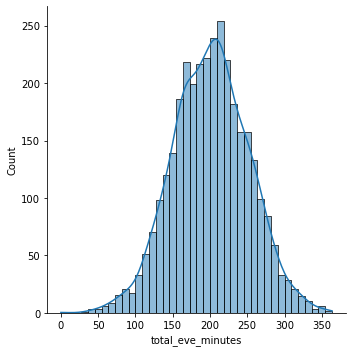

In [45]:
sns.displot(x=df_filtered['total_eve_minutes'],kind='hist',kde=True);

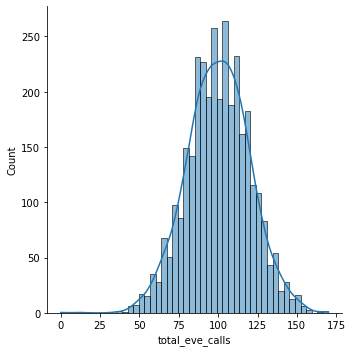

In [46]:
sns.displot(x=df_filtered['total_eve_calls'],kind='hist',kde=True);

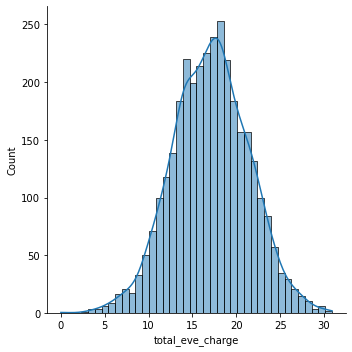

In [47]:
sns.displot(x=df_filtered['total_eve_charge'],kind='hist',kde=True);

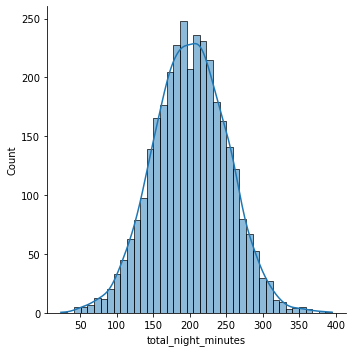

In [48]:
sns.displot(x=df_filtered['total_night_minutes'],kind='hist',kde=True);

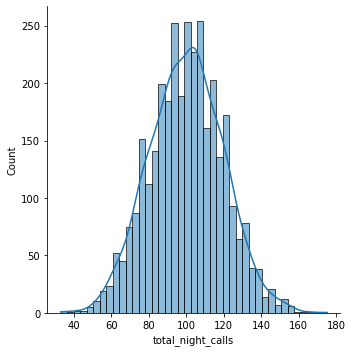

In [49]:
sns.displot(x=df_filtered['total_night_calls'],kind='hist',kde=True);

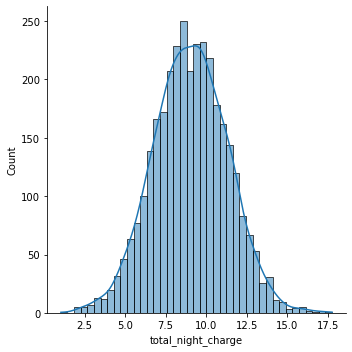

In [50]:
sns.displot(x=df_filtered['total_night_charge'],kind='hist',kde=True);

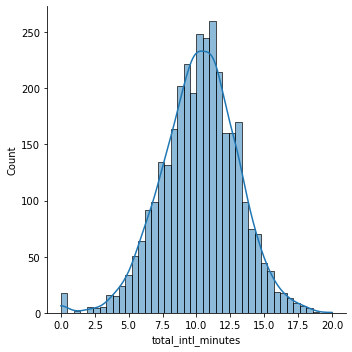

In [51]:
sns.displot(x=df_filtered['total_intl_minutes'],kind='hist',kde=True);

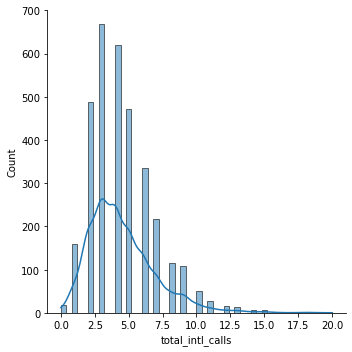

In [52]:
sns.displot(x=df_filtered['total_intl_calls'],kind='hist',kde=True);

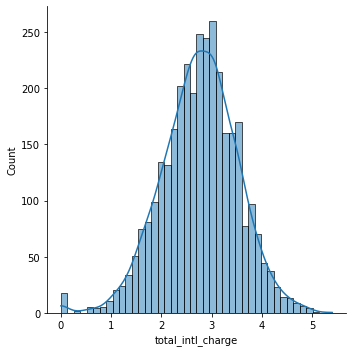

In [53]:
sns.displot(x=df_filtered['total_intl_charge'],kind='hist',kde=True);

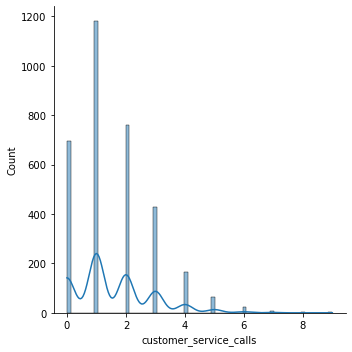

In [54]:
sns.displot(x=df_filtered['customer_service_calls'],kind='hist',kde=True);

# Modeling

## Decesion Tree

In [17]:
X = df_filtered.drop('churn', axis=1)  
y = df_filtered['churn'] 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10)

In [19]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [20]:
y_pred = classifier.predict(X_test) 

In [21]:
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :89.05547226386807


In [22]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.77


In [23]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,False,True,All
True,,,
False,538,34,572
True,39,56,95
All,577,90,667


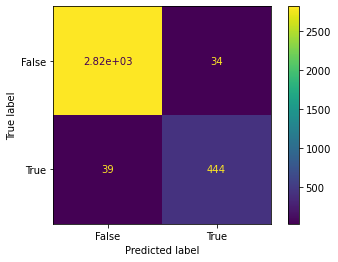

In [24]:
plot_confusion_matrix(classifier, X, y, values_format='.3g')
plt.show()

In [35]:
classifier_2 = DecisionTreeClassifier(max_depth=3, random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

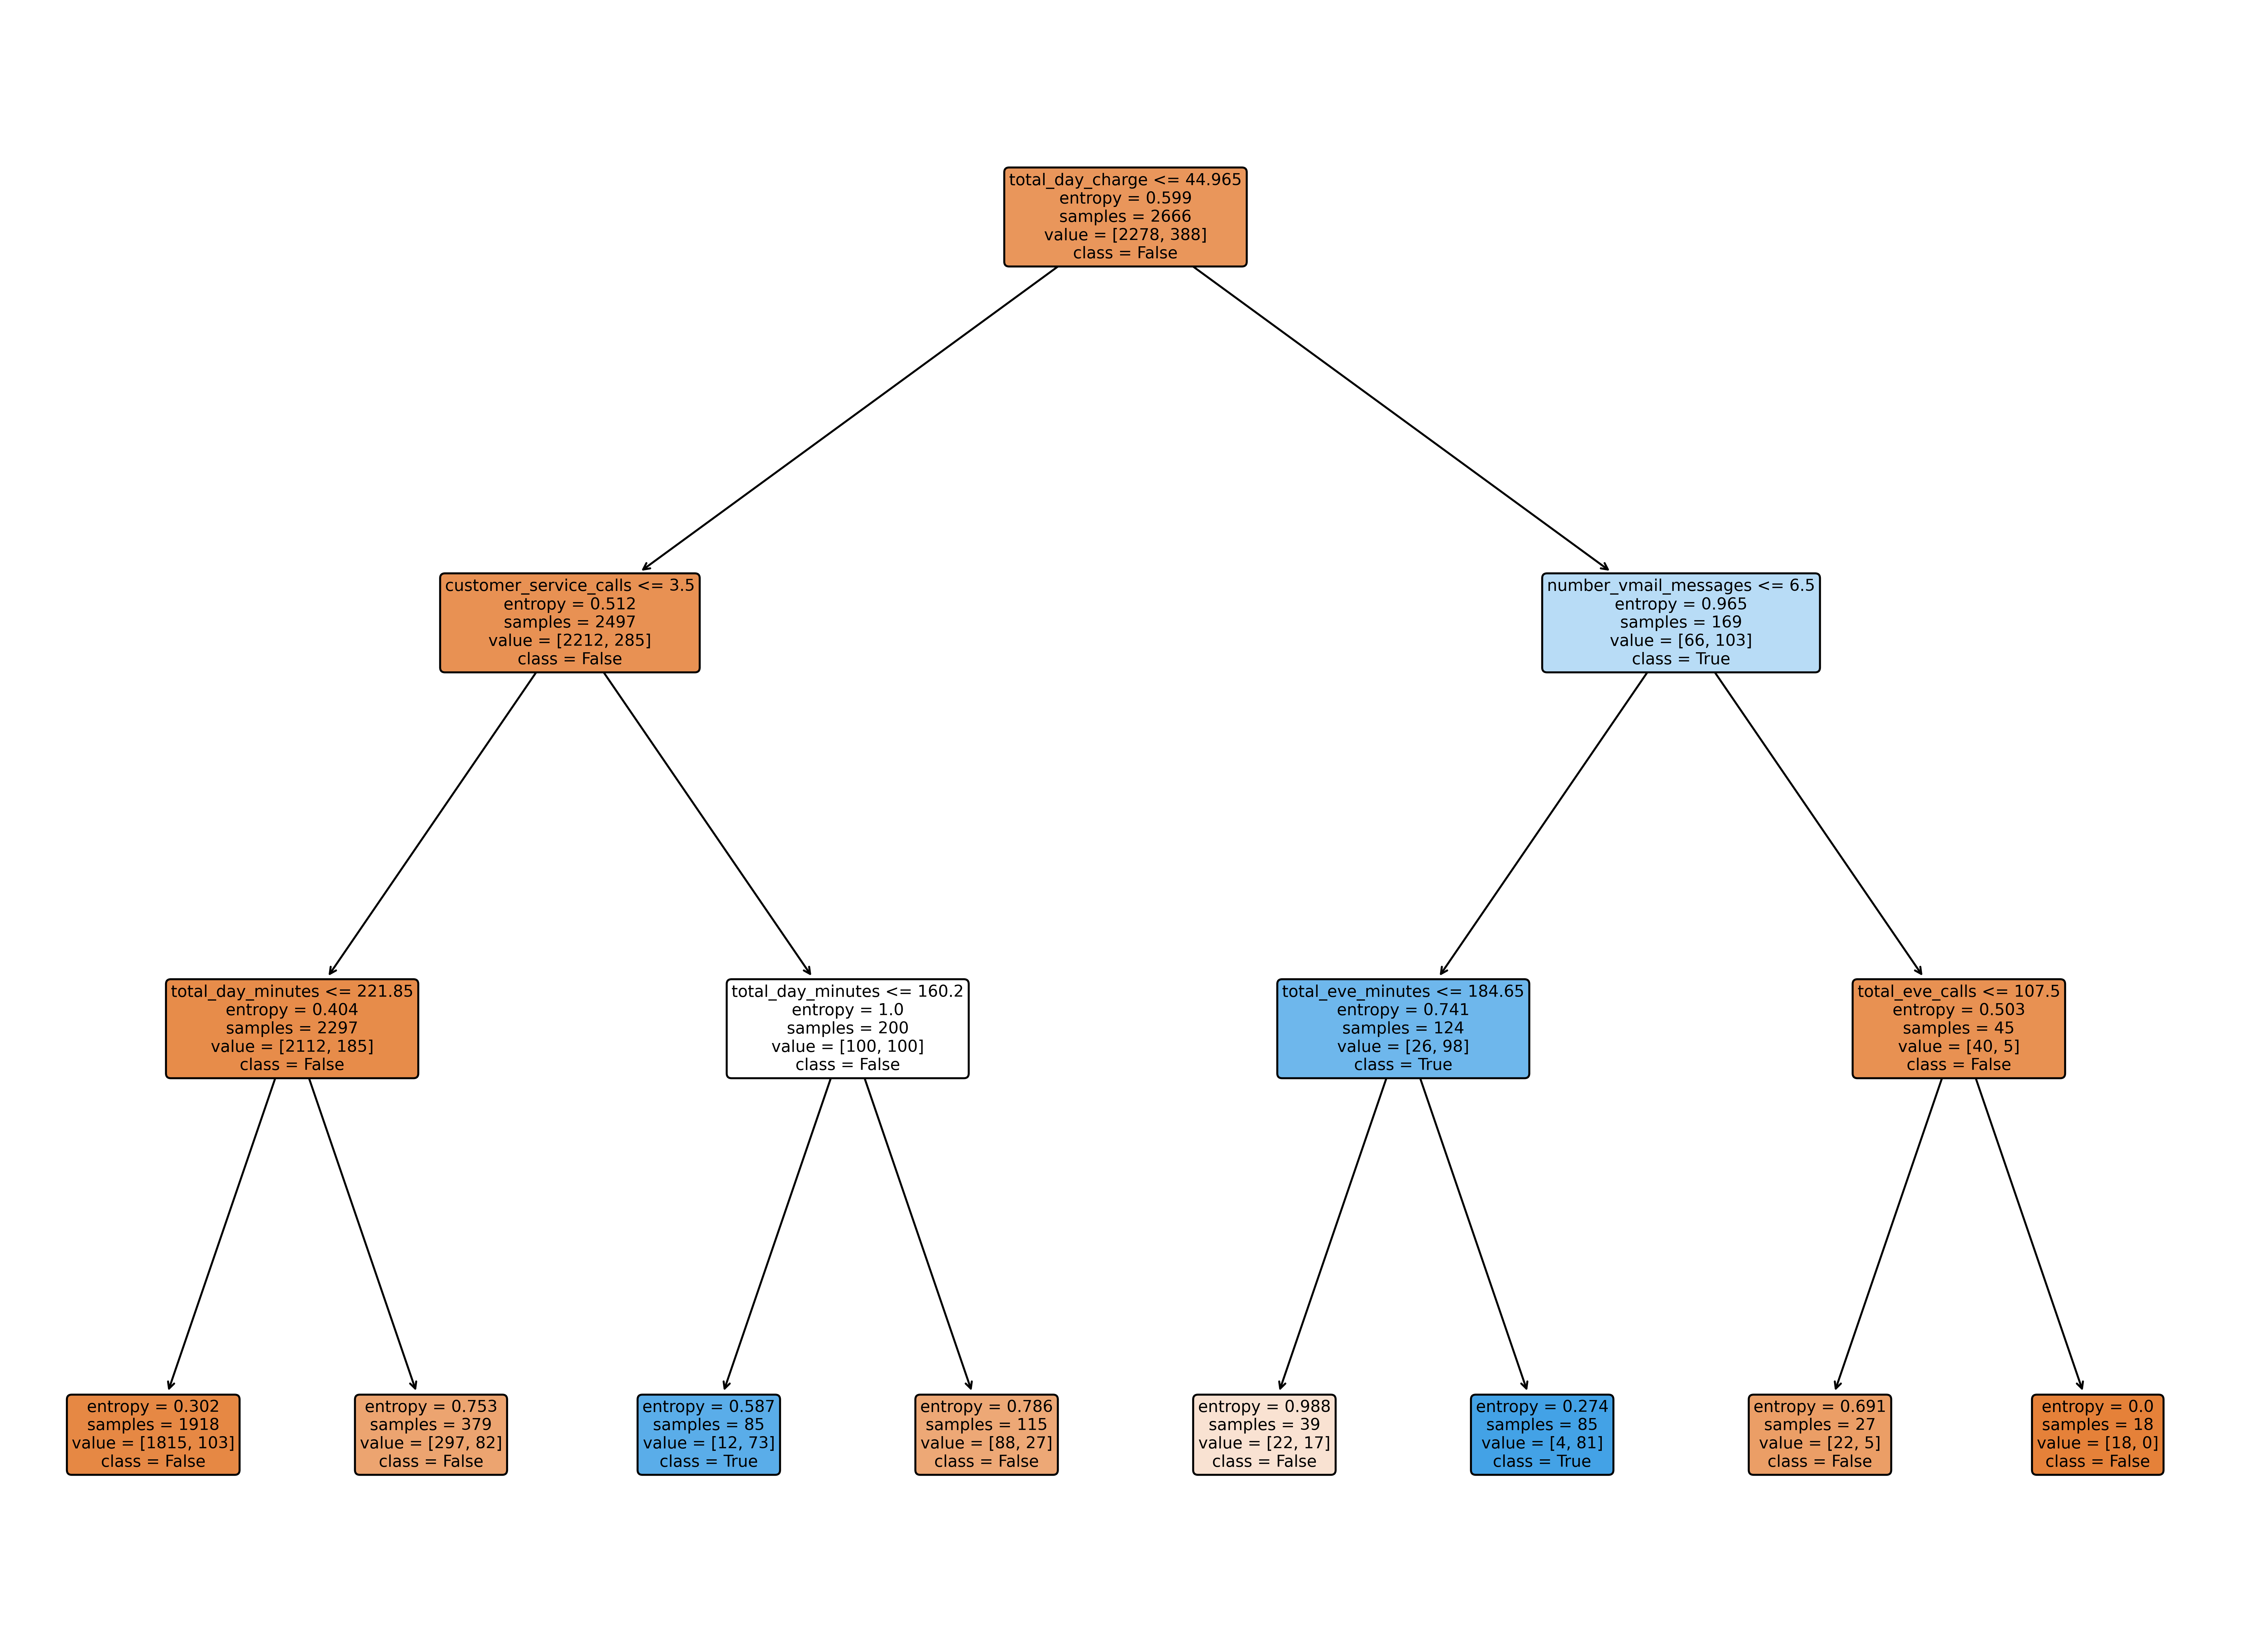

In [56]:
plt.figure(figsize=(20,15), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

## Random Forest

In [9]:
df_filtered['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered.drop('churn', axis=1),
    df_filtered['churn'],
    random_state=51
    )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 15), (834, 15), (2499,), (834,))

In [11]:
forest = RandomForestClassifier(random_state=51)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=51)

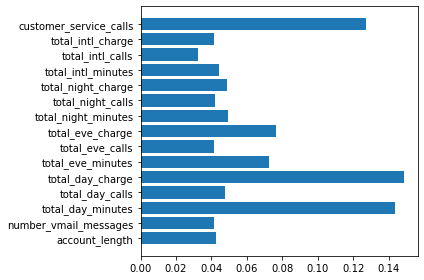

In [12]:
fig, ax = plt.subplots()

ax.barh(width=forest.feature_importances_, y=X_train.columns)
fig.tight_layout()

In [13]:
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

In [14]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96       714
        True       0.89      0.52      0.65       120

    accuracy                           0.92       834
   macro avg       0.90      0.75      0.80       834
weighted avg       0.92      0.92      0.91       834

